In [55]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd

%matplotlib inline

emply = pd.read_excel(open('../../../../Data/CS120Clinical/CS120Final_Baseline.xlsx','r'))
subjects = emply['ID']
subjects = subjects.astype(str)
subjects_employed = subjects[emply['slabels02']==1]
subjects_unemployed = subjects[np.logical_and(emply['slabels02']>=2,emply['slabels02']<=5)]

data_dir = '/home/sohrob/Dropbox/Data/CS120/'
subjects = os.listdir(data_dir)

loc_subject_employed = []
loc_all_employed = np.array([])
loc_subject_unemployed = []
loc_all_unemployed = np.array([])
for subj in subjects:
    filename = data_dir + subj + '/eml.csv'
    if os.path.exists(filename):
        #print filename
        with open(filename) as file_in:
            data = csv.reader(file_in, delimiter='\t')
            loc = np.array([])
            for data_row in data:
                if data_row:
                    loc_string = data_row[6]
                    loc_string = loc_string[1:len(loc_string)-1]
                    loc = np.append(loc, loc_string)
                    if any(subjects_employed==subj):
                        loc_all_employed = np.append(loc_all, loc_string)
                    else:
                        loc_all_unemployed = np.append(loc_all, loc_string)
        if any(subjects_employed==subj):
            loc_subject_employed.append(np.unique(loc))
        else:
            loc_subject_unemployed.append(np.unique(loc))



[]


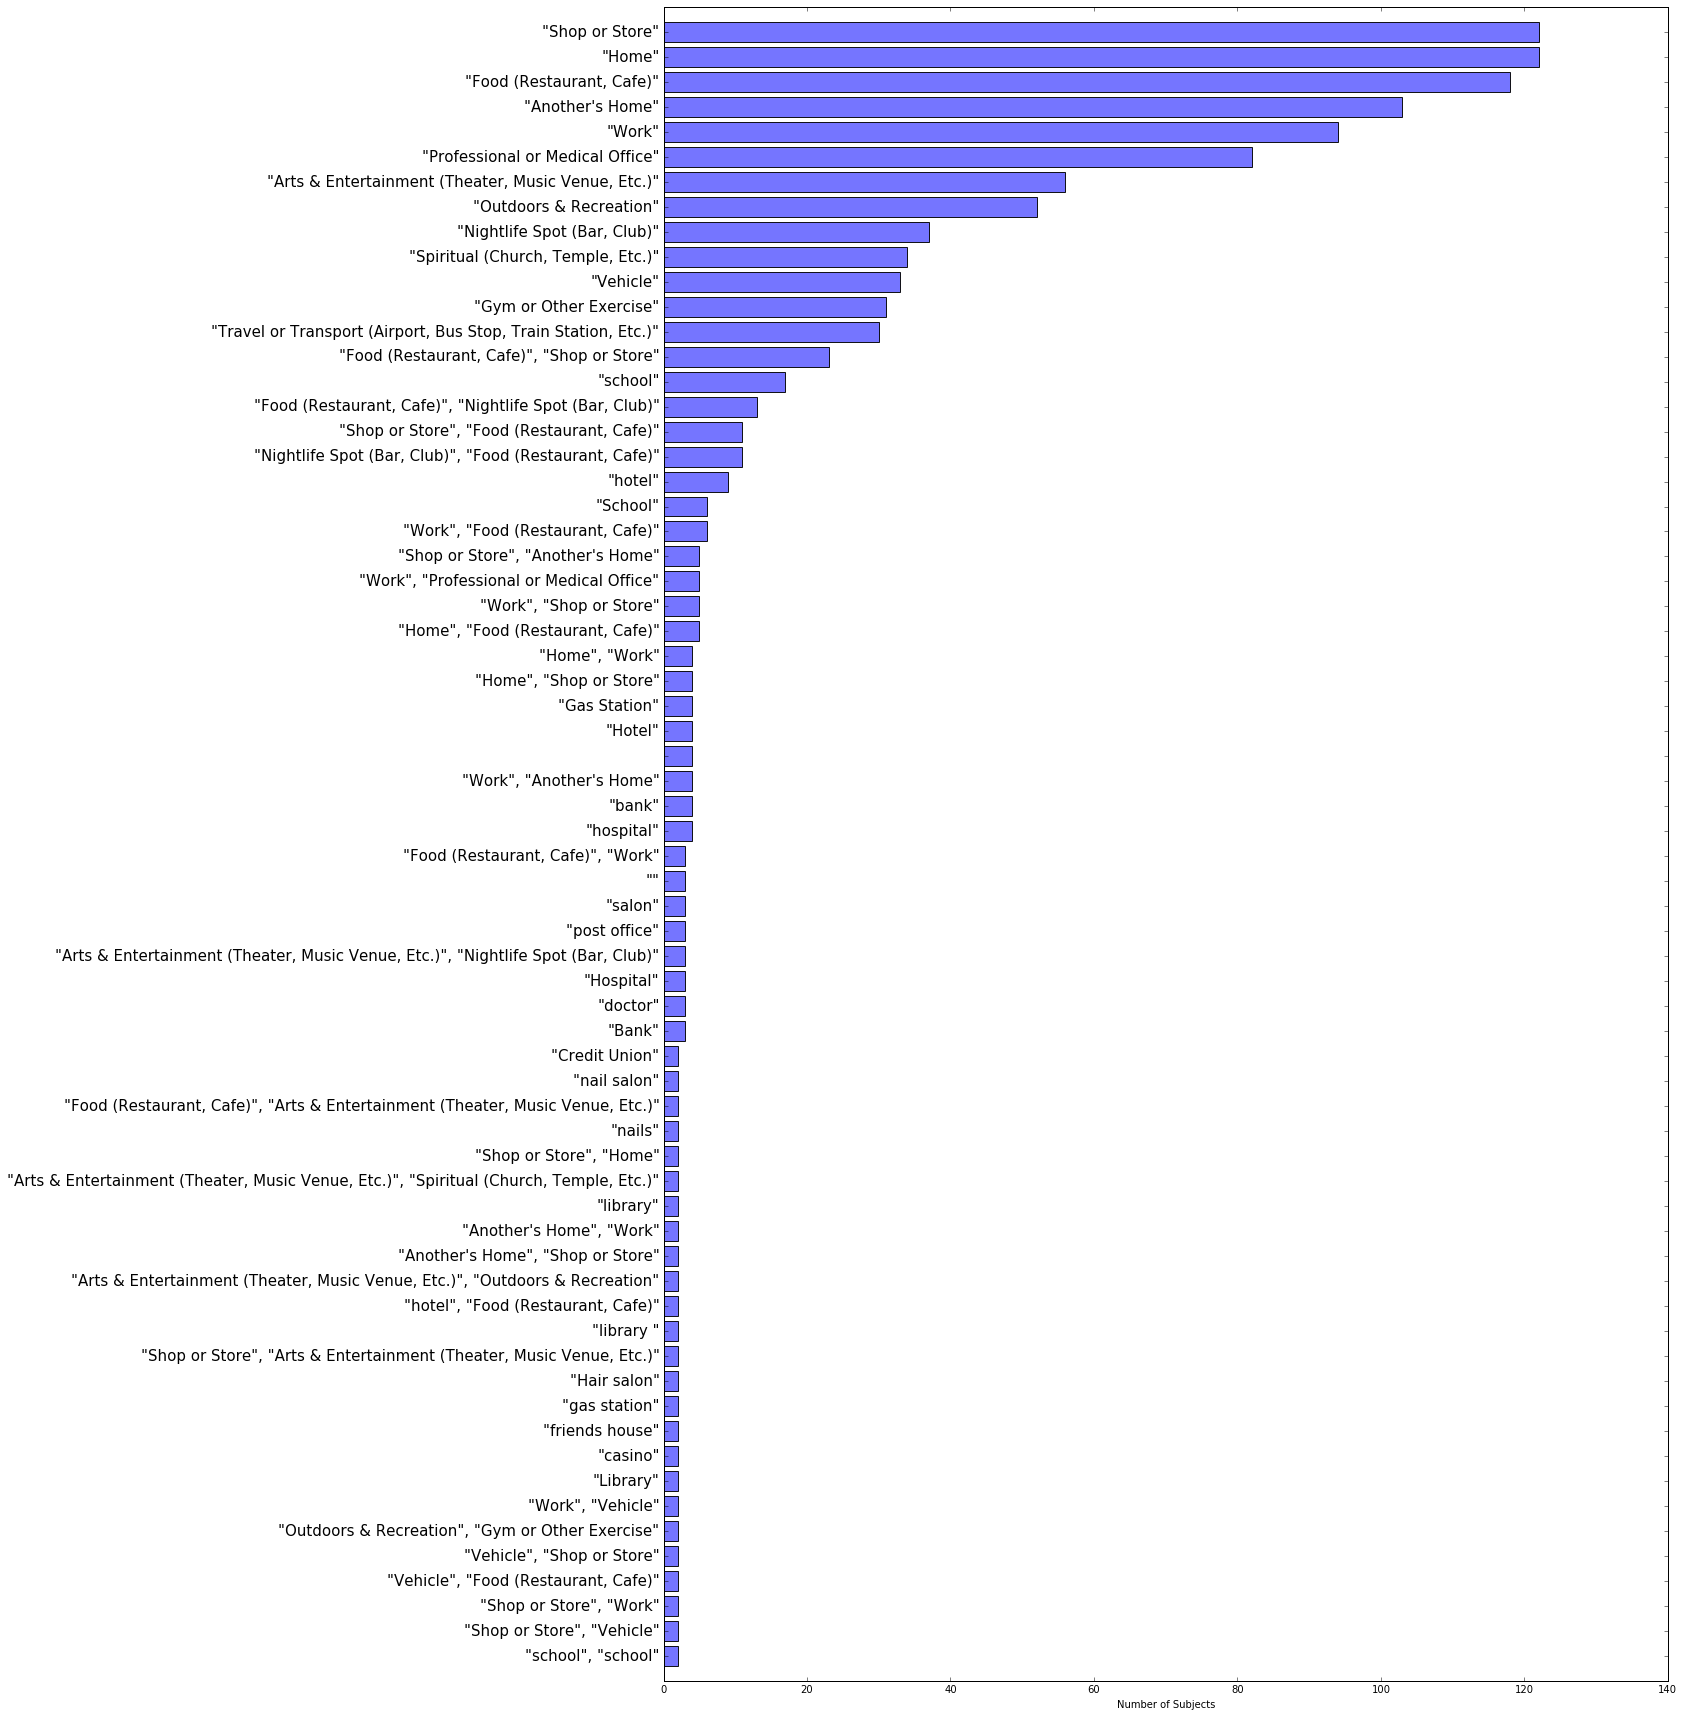

In [63]:
# finding number of subjects who used each location (employed)
import pickle

save_results = False

loc_all_uniq = np.unique(loc_all_employed)
freq = np.zeros(loc_all_uniq.size)
i = 0
for loc_uniq in loc_all_uniq:
    for loc_subj in loc_subject_employed:
        if loc_uniq in loc_subj:
            freq[i] += 1
    i += 1

loc_all_uniq = loc_all_uniq[np.where(freq>1)]
freq = freq[np.where(freq>1)]

ind_sort = np.argsort(freq)
loc_all_uniq = loc_all_uniq[ind_sort]
freq = freq[ind_sort]

loc_top10 = loc_all_uniq[91:]

# saving the most frequent locations
if save_results:
    with open('top10.dat', 'w') as file_out:
        pickle.dump(loc_top10, file_out)
    file_out.close()

# plotting
plt.figure(figsize=(18,30))
show_from = 0
plt.barh(range(len(loc_all_uniq)-show_from), freq[show_from:], align='center', color=(.4,.4,1), alpha=0.9)
plt.xlabel('Number of Subjects')
axes = plt.gca()
axes.set_ylim([-1, len(loc_all_uniq)-show_from])
plt.yticks(range(len(loc_all_uniq)-show_from), loc_all_uniq[show_from:], fontsize=15, color=(0,0,0));
print loc_all_uniq[91:]

[]


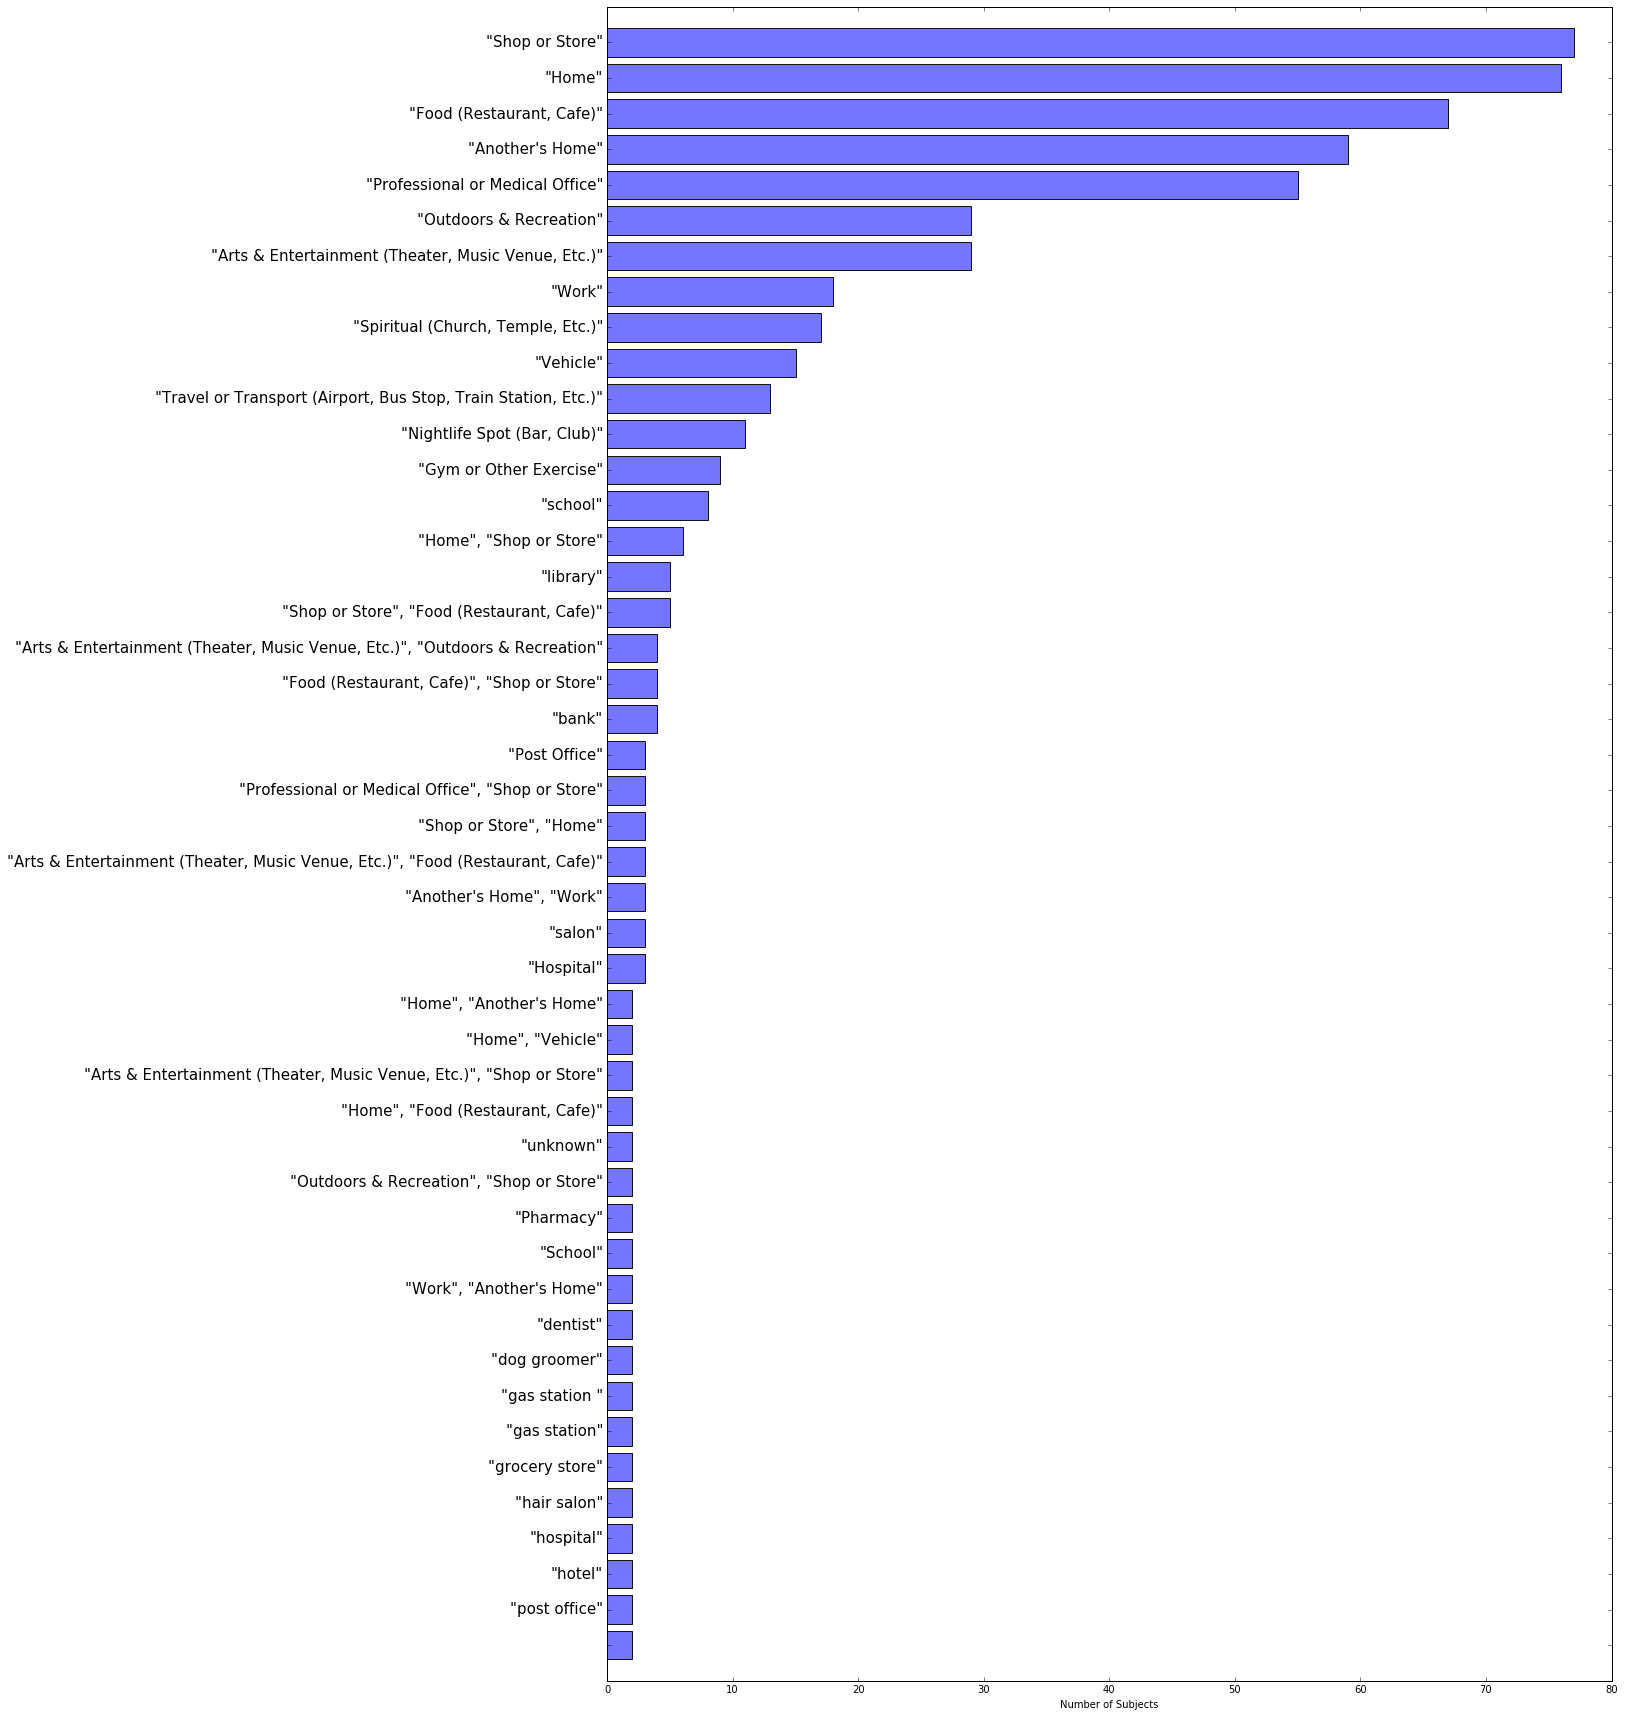

In [64]:
# finding number of subjects who used each location (unemployed)
import pickle

save_results = False

loc_all_uniq = np.unique(loc_all_unemployed)
freq = np.zeros(loc_all_uniq.size)
i = 0
for loc_uniq in loc_all_uniq:
    for loc_subj in loc_subject_unemployed:
        if loc_uniq in loc_subj:
            freq[i] += 1
    i += 1

loc_all_uniq = loc_all_uniq[np.where(freq>1)]
freq = freq[np.where(freq>1)]

ind_sort = np.argsort(freq)
loc_all_uniq = loc_all_uniq[ind_sort]
freq = freq[ind_sort]

loc_top10 = loc_all_uniq[91:]

# saving the most frequent locations
if save_results:
    with open('top10.dat', 'w') as file_out:
        pickle.dump(loc_top10, file_out)
    file_out.close()

# plotting
plt.figure(figsize=(18,30))
show_from = 0
plt.barh(range(len(loc_all_uniq)-show_from), freq[show_from:], align='center', color=(.4,.4,1), alpha=0.9)
plt.xlabel('Number of Subjects')
axes = plt.gca()
axes.set_ylim([-1, len(loc_all_uniq)-show_from])
plt.yticks(range(len(loc_all_uniq)-show_from), loc_all_uniq[show_from:], fontsize=15, color=(0,0,0));
print loc_all_uniq[91:]

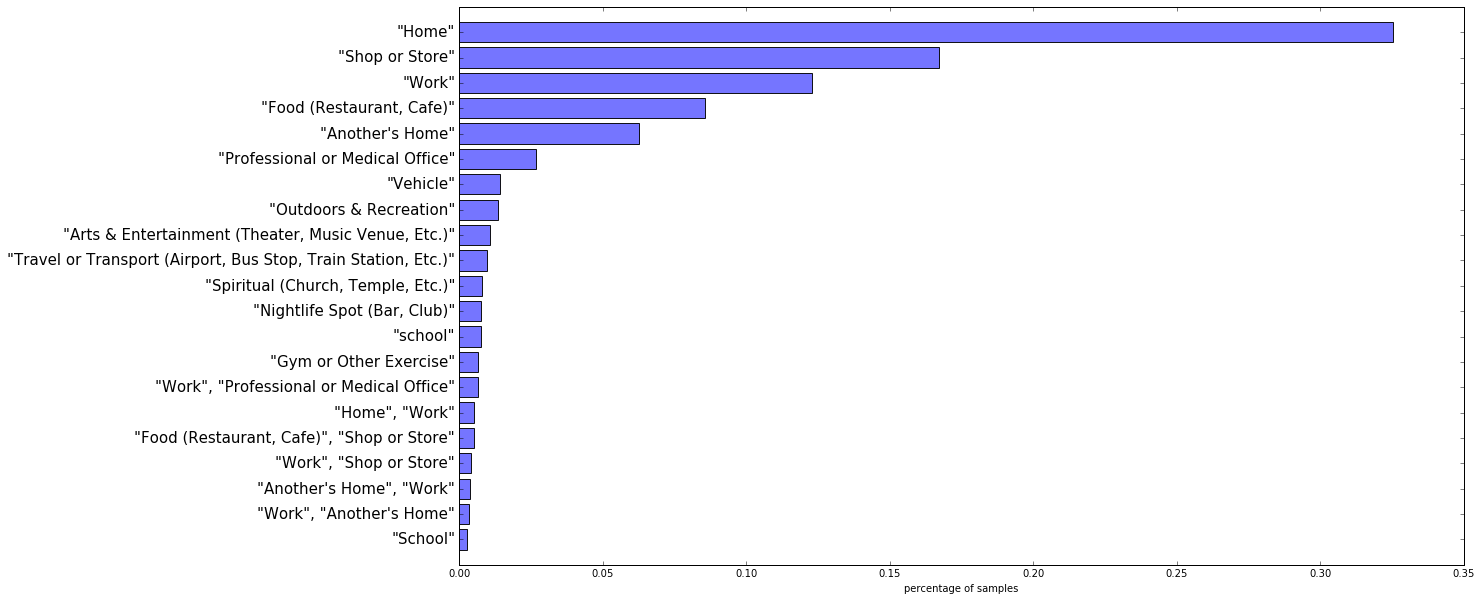

In [127]:
# finding the number of samples for each location in all subjects
# this will be roughly equivalent to the average percentage of time spent at that location across the subjects

loc_all_uniq = np.unique(loc_all)

# filtering based on freq > 1
freq = np.zeros(loc_all_uniq.size)
for (i,loc_uniq) in enumerate(loc_all_uniq):
    for loc_subj in loc_subject:
        if loc_uniq in loc_subj:
            freq[i] += 1
            
loc_all_uniq = loc_all_uniq[np.where(freq>1)]

perc = np.array([])
for loc_uniq in loc_all_uniq:
    inds = np.where(loc_all==loc_uniq)[0]
    perc = np.append(perc, inds.size/float(loc_all.size))
ind_sort = np.argsort(perc)
loc_all_uniq = loc_all_uniq[ind_sort]
perc = perc[ind_sort]

plt.figure(figsize=(18,10))
show_from = 80
plt.barh(range(len(loc_all_uniq)-show_from), perc[show_from:], align='center', color=(.4,.4,1), alpha=0.9)
plt.xlabel('percentage of samples')
axes = plt.gca()
axes.set_ylim([-1, len(loc_all_uniq)-show_from])
plt.yticks(range(len(loc_all_uniq)-show_from), loc_all_uniq[show_from:], fontsize=15, color=(0,0,0));

In [61]:
print loc_all_uniq

['"school", "school"' '"Shop or Store", "Vehicle"'
 '"Shop or Store", "Work"' '"Vehicle", "Food (Restaurant, Cafe)"'
 '"Vehicle", "Shop or Store"'
 '"Outdoors & Recreation", "Gym or Other Exercise"' '"Work", "Vehicle"'
 '"Library"' '"casino"' '"friends house"' '"gas station"' '"Hair salon"'
 '"Shop or Store", "Arts & Entertainment (Theater, Music Venue, Etc.)"'
 '"library "' '"hotel", "Food (Restaurant, Cafe)"'
 '"Arts & Entertainment (Theater, Music Venue, Etc.)", "Outdoors & Recreation"'
 '"Another\'s Home", "Shop or Store"' '"Another\'s Home", "Work"'
 '"library"'
 '"Arts & Entertainment (Theater, Music Venue, Etc.)", "Spiritual (Church, Temple, Etc.)"'
 '"Shop or Store", "Home"' '"nails"'
 '"Food (Restaurant, Cafe)", "Arts & Entertainment (Theater, Music Venue, Etc.)"'
 '"nail salon"' '"Credit Union"' '"Bank"' '"doctor"' '"Hospital"'
 '"Arts & Entertainment (Theater, Music Venue, Etc.)", "Nightlife Spot (Bar, Club)"'
 '"post office"' '"salon"' '""' '"Food (Restaurant, Cafe)", "Work